In [575]:
# THIS CODE IS DONE BY
# CS20B1057
# A S V DHANUSH
# Skin Cancer Dataset
# IIITDM YR3
'''
The Cancerous Cells are: (C)
Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec) 
basal cell carcinoma (bcc) 
melanoma (mel) 
'''
'''
The Non Cancerous Cells are : (NC)
1)benign keratosis-like lesions (solar lentigines /  
seborrheic keratoses 
and lichen-planus like keratoses, bkl)
2)dermatofibroma (df) 
3)melanocytic nevi (nv) 
4)vascular lesions (angiomas, angiokeratomas, 
pyogenic granulomas and hemorrhage, vasc).
'''

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
df = pd.read_csv('./skin_cancer.csv')
df


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [576]:
df_copy = df.copy(deep=True)
# shape of the dataframe
print(df_copy.shape)
print(df_copy.dtypes)

# types of cells
list_unique_cells = list(df_copy["dx"].unique())
list_unique_cells


(10015, 7)
lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object


['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']

In [577]:
print(df_copy)


         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]


In [578]:
# For prediction of cancer lesion id and image id are not required
# hence we drop it


df_copy = df_copy.drop(['image_id'], axis=1)
df_copy = df_copy.drop(['lesion_id'], axis=1)
df_copy
# also since dx_type in all cases is the same we can drop that column
df_copy = df_copy.drop(['dx_type'], axis=1)
# grouping based on the type of cells(pigmented lesions)
# based on cancerrous cells
count_people_bcc = df_copy[df_copy["dx"] == "bcc"]["dx"].count()
print(f"\n{count_people_bcc} People have (bcc)\n")
count_people_akiec = df_copy[df_copy["dx"] == "akiec"]["dx"].count()
print(f"{count_people_akiec} People have (akiec)\n")
count_people_mel = df_copy[df_copy["dx"] == "mel"]["dx"].count()
print(f"{count_people_mel} People have (mel)\n")

# HENCE TOTAL NUMBER OF PEOPLE WITH CANCER ARE :
count_cancer_people = count_people_bcc+count_people_akiec+count_people_mel
print(f"Total of {count_cancer_people} People have Cancer\n")



514 People have (bcc)

327 People have (akiec)

1113 People have (mel)

Total of 1954 People have Cancer



[6705, 1113, 1099, 514, 327, 142, 115]


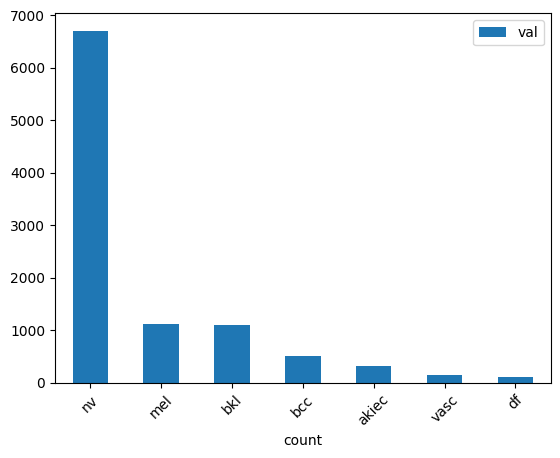

In [579]:
# which cell is more prominent
cell_counts = list(df_copy["dx"].value_counts())
print(cell_counts)
'''
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
'''

# plotting a bar graph
plt0 = pd.DataFrame(
    {'count': ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df'], 'val': cell_counts})
ax0 = plt0.plot.bar(x='count', y='val', rot=45)


In [580]:
# dataframe with people with cancer
df_with_cancer = df_copy[(df_copy["dx"] == "bcc") | (
    df_copy["dx"] == "akiec") | (df_copy["dx"] == "mel")]
print(df_with_cancer)

# shape of this dataframe
print(df_with_cancer.shape)
# which is same as our count


          dx   age     sex     localization
1211     mel  40.0  female            chest
1212     mel  40.0  female            chest
1213     mel  80.0    male  upper extremity
1214     mel  60.0    male            chest
1215     mel  60.0    male            chest
...      ...   ...     ...              ...
10010  akiec  40.0    male          abdomen
10011  akiec  40.0    male          abdomen
10012  akiec  40.0    male          abdomen
10013  akiec  80.0    male             face
10014    mel  70.0  female             back

[1954 rows x 4 columns]
(1954, 4)


In [581]:
# dataframe with people without cancer
df_without_cancer = df_copy[(df_copy["dx"] == "bkl") | (
    df_copy["dx"] == "df") | (df_copy["dx"] == "nv") | (df_copy["dx"] == "vasc")]
print(df_without_cancer)

# shape of this dataframe
print(df_without_cancer.shape)
# which is same as our count


       dx   age     sex localization
0     bkl  80.0    male        scalp
1     bkl  80.0    male        scalp
2     bkl  80.0    male        scalp
3     bkl  80.0    male        scalp
4     bkl  75.0    male          ear
...   ...   ...     ...          ...
9682   nv  20.0    male        chest
9683   nv  20.0    male         back
9684   nv  20.0    male         back
9685   nv  40.0    male         neck
9686   nv  50.0  female         face

[8061 rows x 4 columns]
(8061, 4)


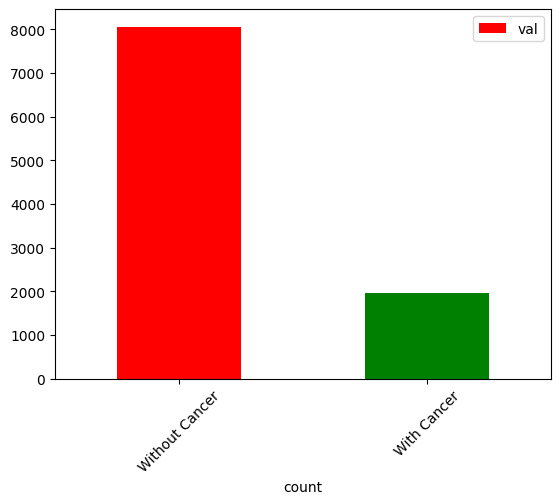

In [582]:
# plotting a bar graph
plt1 = pd.DataFrame({'count': ['Without Cancer', 'With Cancer'], 'val': [
                    df_without_cancer.shape[0], df_with_cancer.shape[0]]})
ax = plt1.plot.bar(x='count', y='val', rot=45, color=['red', 'green'])


In [583]:
# LET US FIND THE RATIO OF THE NUMBER OF WITH CANCER PATIENTS
percentatge_with_cancer = df_with_cancer.shape[0]/df_copy.shape[0]
percentatge_with_cancer = round(percentatge_with_cancer, 2)
print(f"{percentatge_with_cancer * 100}% people have cancer!")
print(f"{100 - (percentatge_with_cancer * 100)}% people donot have cancer!")


20.0% people have cancer!
80.0% people donot have cancer!


In [584]:
# number of males with cancer
males_with_cancer = df_with_cancer[df_with_cancer["sex"] == "male"]
print(males_with_cancer)
print(f"\n{males_with_cancer.shape[0]} Males have cancer\n")
# percentage of males with cancer from overall dataset population
percentatge_males_with_cancer = males_with_cancer.shape[0]/df_copy.shape[0]
percentatge_males_with_cancer = round(percentatge_males_with_cancer, 2)
print(f"{percentatge_males_with_cancer * 100}% people who are males have cancer!")


          dx   age   sex     localization
1213     mel  80.0  male  upper extremity
1214     mel  60.0  male            chest
1215     mel  60.0  male            chest
1218     mel  55.0  male             back
1219     mel  55.0  male             back
...      ...   ...   ...              ...
10008  akiec  60.0  male             face
10010  akiec  40.0  male          abdomen
10011  akiec  40.0  male          abdomen
10012  akiec  40.0  male          abdomen
10013  akiec  80.0  male             face

[1227 rows x 4 columns]

1227 Males have cancer

12.0% people who are males have cancer!


In [585]:
# number of females with cancer
females_with_cancer = df_with_cancer[df_with_cancer["sex"] == "female"]
print(females_with_cancer)
print(f"\n{females_with_cancer.shape[0]} Females have cancer\n")
# percentage of females with cancer from overall dataset population
percentatge_females_with_cancer = females_with_cancer.shape[0]/df_copy.shape[0]
percentatge_females_with_cancer = round(percentatge_females_with_cancer, 4)
print(f"{percentatge_females_with_cancer * 100}% of overall people who are females have cancer!")


          dx   age     sex     localization
1211     mel  40.0  female            chest
1212     mel  40.0  female            chest
1216     mel  40.0  female             back
1217     mel  45.0  female  lower extremity
1223     mel  85.0  female  lower extremity
...      ...   ...     ...              ...
10003  akiec  60.0  female             face
10006  akiec  55.0  female             face
10007  akiec  60.0  female             face
10009  akiec  75.0  female  lower extremity
10014    mel  70.0  female             back

[727 rows x 4 columns]

727 Females have cancer

7.26% of overall people who are females have cancer!


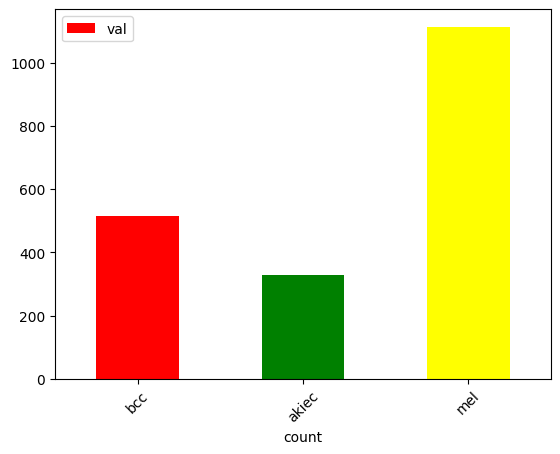

In [586]:
# plotting typer of cancerrous cells count
plt2 = pd.DataFrame({'count': ['bcc', 'akiec', 'mel'], 'val': [
                    count_people_bcc, count_people_akiec, count_people_mel]})
ax1 = plt2.plot.bar(x='count', y='val', rot=45,
                    color=['red', 'green', 'yellow'])


At the following places the lesions are seen : 
 ['chest' 'upper extremity' 'back' 'lower extremity' 'face' 'abdomen'
 'foot' 'neck' 'ear' 'trunk' 'scalp' 'unknown' 'hand']
Total Unique Places of lesion :  13
[539, 324, 318, 315, 127, 89, 59, 53, 47, 32, 20, 16, 15]


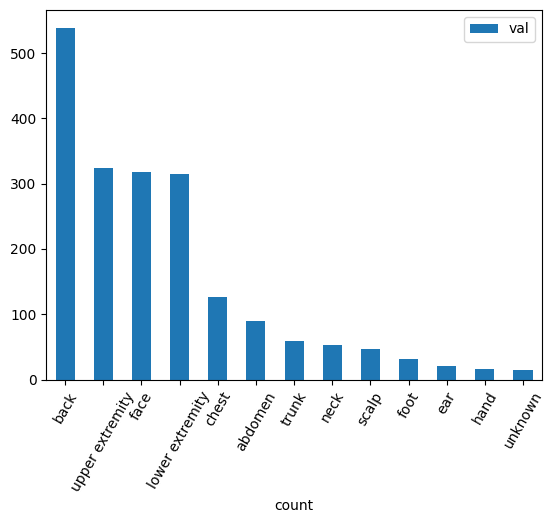

In [587]:
# plotting based on place of lesion
print("At the following places the lesions are seen : \n",
      df_with_cancer["localization"].unique())
unique_place_lesion_list = ['back', 'upper extremity', 'face', 'lower extremity',
                            'chest', 'abdomen', 'trunk', 'neck', 'scalp', 'foot', 'ear', 'hand', 'unknown']
print("Total Unique Places of lesion : ", len(unique_place_lesion_list))
# taking the lesion place counts in a list to plot
lesion_place_count_list = list(df_with_cancer["localization"].value_counts())
print(lesion_place_count_list)
df_with_cancer["localization"].value_counts()

# #plot
plt2 = pd.DataFrame({'count': unique_place_lesion_list,
                    'val': lesion_place_count_list})
ax1 = plt2.plot.bar(x='count', y='val', rot=60)

# HENCE WE CAN CONCLUDE THAT LESIONS AT BACK ARE MORE PROMINENT


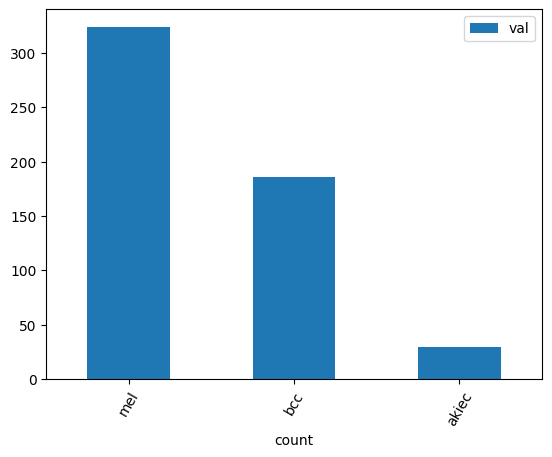

In [588]:
# LET US NOW SEE WHICH TYPE OF CANCER CELL IS MORE PROMINENT AT THE BACK REGION
prom_back_cell = list(
    df_with_cancer[df_with_cancer["localization"] == "back"]["dx"].value_counts())
prom_back_cell
# plot
plt3 = pd.DataFrame({'count': ['mel', 'bcc', 'akiec'], 'val': prom_back_cell})
ax2 = plt3.plot.bar(x='count', y='val', rot=60)


# HENCE THE (mel) cancerrous cell is more prominent near the back


In [589]:
# NOW LET US CLASSIFY IS A PERSON HAS CANCER OR NOT
# BEFORE THAT LET US FIRST CREATE ANOTHER COLUMN WITH 'NC' - NO CANCER AND 'N' - FOR CANCER

df_copy["nc_or_c"] = "NC"
df_copy["nc_or_c"][(df_copy["dx"] == "mel") | (
    df_copy["dx"] == "bcc") | (df_copy["dx"] == "akiec")] = "C"
# UPDATED THE COLUMN "nc_or_c" in the dataframe
df_copy


C:\Users\91818\AppData\Local\Temp\ipykernel_51316\3389694182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["nc_or_c"][(df_copy["dx"] == "mel") | (


,dx,age,sex,localization,nc_or_c
0,bkl,80.0,male,scalp,NC
1,bkl,80.0,male,scalp,NC
2,bkl,80.0,male,scalp,NC
3,bkl,80.0,male,scalp,NC
4,bkl,75.0,male,ear,NC
...,...,...,...,...,...
10010,akiec,40.0,male,abdomen,C
10011,akiec,40.0,male,abdomen,C
10012,akiec,40.0,male,abdomen,C
10013,akiec,80.0,male,face,C


In [590]:
# converting string data into numerical data
# localization  numbering is give as follows

'''
['chest'            (1)
'upper extremity'   (2)
'back'              (3)
'lower extremity'   (4)
'face'              (5)
'abdomen'           (6)
 'foot'             (7)
 'neck'             (8)
 'ear'              (9)
 'trunk'            (10)
 'scalp'            (11)
 'unknown'          (12)
 'hand']            (13) 
 '''

'''
 ['bkl'             (1)
 'nv'               (2)
 'df'               (3)
 'mel'              (4)
 vasc'              (5)
 'bcc'              (6)
 'akiec']           (7)
 '''
 #sex numbering given as follows
'''
 male   - (0)
 female - (1)
 unknown - (3)
'''
'''
for nan values the median of the ages are taken in the age column
'''
# dx numbering is given as follows
print(df_copy.shape[0])
# converting the categorical variable sex to numerical by assigning values
df_copy["sex"] = df_copy["sex"].map({"male": 0, "female": 1, "unknown": 3})
# converting the categorical variable localization to numerical by assigning values
df_copy["localization"] = df_copy["localization"].map({"chest": 0, "upper extremity": 1, "back": 2, "lower extremity": 3, "face": 4, "abdomen": 5, "foot": 6,
                                                       "neck": 7, "ear": 8, "trunk": 9, "scalp": 10, "unknown": 11, "hand": 12, "genital": 13, "acral": 14})
# converting the categorical dx  to numerical by assigning values
df_copy["dx"] = df_copy["dx"].map({"bkl": 0,"nv": 1, "df": 2,"mel": 3,"vasc": 4, "bcc": 5,"akiec":6})

print(df_copy)


10015
       dx   age  sex  localization nc_or_c
0       0  80.0    0            10      NC
1       0  80.0    0            10      NC
2       0  80.0    0            10      NC
3       0  80.0    0            10      NC
4       0  75.0    0             8      NC
...    ..   ...  ...           ...     ...
10010   6  40.0    0             5       C
10011   6  40.0    0             5       C
10012   6  40.0    0             5       C
10013   6  80.0    0             4       C
10014   3  70.0    1             2       C

[10015 rows x 5 columns]


In [591]:
df_copy.dtypes


dx                int64
age             float64
sex               int64
localization      int64
nc_or_c          object
dtype: object

In [592]:
# LOOKS LIKE THERE ARE SOME NULL VALUES LET US FIND THEM

count_nan = df_copy["age"].isnull().sum()
print(count_nan)
df_copy.shape

# FILLING THOSE VALUES WITH MEDIAN OF AGES
df_copy["age"] = df_copy["age"].fillna(value=df_copy["age"].median())
#df_copy = df_copy.dropna()
df_copy


57


,dx,age,sex,localization,nc_or_c
0,0,80.0,0,10,NC
1,0,80.0,0,10,NC
2,0,80.0,0,10,NC
3,0,80.0,0,10,NC
4,0,75.0,0,8,NC
...,...,...,...,...,...
10010,6,40.0,0,5,C
10011,6,40.0,0,5,C
10012,6,40.0,0,5,C
10013,6,80.0,0,4,C


In [593]:
# KNN based on type of cell
df_cell_based = df_copy["dx"]

df_without_dx_c_or_c = df_copy.drop(["nc_or_c", "dx"], axis=1)
df_without_dx_c_or_c

train_X, val_X, train_y, val_y = train_test_split(
    df_without_dx_c_or_c, df_cell_based, test_size=0.3, random_state=23)
acc_list2=[]
acc_index2=[]
for i in range(1,100,2):
    n2 = KNN(n_neighbors=i)
    n2.fit(train_X, train_y)
    pred2 = n2.predict(val_X)

    #print("The Predicted Values Are")
    #print(pred2)

    #print("Confusion Matrix")
    confusion2 = confusion_matrix(val_y, pred2)
    #print(confusion2)

    #print("Accuracy Score")
    accur2 = accuracy_score(val_y, pred2)
    acc_list2.append(accur2)
    acc_index2.append(i)
    print(accur2)


0.5414309484193012
0.6252911813643927
0.6575707154742096
0.6898502495840266
0.6845257903494176
0.6908485856905158
0.697504159733777
0.6955074875207987
0.6985024958402662
0.6978369384359401
0.6928452579034942
0.697504159733777
0.7008319467554076
0.6965058236272879
0.7051580698835275
0.7008319467554076
0.7031613976705491
0.7004991680532446
0.702828618968386
0.7008319467554076
0.6985024958402662
0.6998336106489185
0.697171381031614
0.6951747088186356
0.6931780366056572
0.6951747088186356
0.691846921797005
0.6935108153078203
0.6911813643926789
0.691846921797005
0.691846921797005
0.6925124792013311
0.6928452579034942
0.6925124792013311
0.691846921797005
0.6908485856905158
0.6911813643926789
0.6875207986688852
0.6868552412645591
0.6858569051580699
0.686522462562396
0.6851913477537438
0.6848585690515807
0.6875207986688852
0.6858569051580699
0.6848585690515807
0.6845257903494176
0.6835274542429285
0.6841930116472545
0.6825291181364392


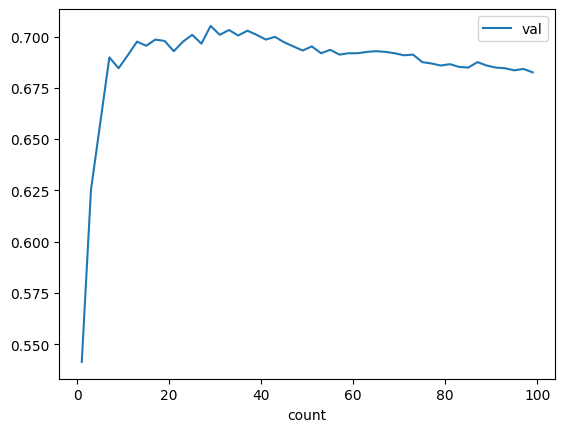

In [594]:
plt6 = pd.DataFrame({'count': acc_index2, 'val': acc_list2})
ax_k= plt6.plot(x='count', y='val')
#at k=33 we get 70% accuracy

In [595]:
# we take the tatget variable as 'nc_or_c' column

y = df_copy["nc_or_c"]
df_without_target = df_copy.drop('nc_or_c', axis=1)
# df_without_target = df_copy.drop('dx',axis=1)
print(df_without_target)
features = list(df_without_target.columns)
print(features)
df_features = df_copy[features]
print(df_features)
# # Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(
    df_features, y, test_size=0.3, random_state=42)

print(df_features.shape)


       dx   age  sex  localization
0       0  80.0    0            10
1       0  80.0    0            10
2       0  80.0    0            10
3       0  80.0    0            10
4       0  75.0    0             8
...    ..   ...  ...           ...
10010   6  40.0    0             5
10011   6  40.0    0             5
10012   6  40.0    0             5
10013   6  80.0    0             4
10014   3  70.0    1             2

[10015 rows x 4 columns]
['dx', 'age', 'sex', 'localization']
       dx   age  sex  localization
0       0  80.0    0            10
1       0  80.0    0            10
2       0  80.0    0            10
3       0  80.0    0            10
4       0  75.0    0             8
...    ..   ...  ...           ...
10010   6  40.0    0             5
10011   6  40.0    0             5
10012   6  40.0    0             5
10013   6  80.0    0             4
10014   3  70.0    1             2

[10015 rows x 4 columns]
(10015, 4)


In [596]:


# Specify Model classification
# KNN CLASSIFICATION
acc_list = []
acc_index = []
for i in range(1, 100, 2):
    n1 = KNN(n_neighbors=i)
    n1.fit(train_X, train_y)
    pred1 = n1.predict(val_X)

    #print("The Predicted Values Are")
    # print(pred1)

    #print("Confusion Matrix")
    confusion1 = confusion_matrix(val_y, pred1)
    # print(confusion1)

    #print("Accuracy Score")
    accur1 = accuracy_score(val_y, pred1)
    acc_list.append(accur1)
    acc_index.append(i)

    # print(accur1)
print(acc_list)
# for k = 1 we get the best accuracy score


[0.9966722129783694, 0.9913477537437604, 0.9906821963394343, 0.9880199667221298, 0.9853577371048253, 0.9846921797004992, 0.9823627287853577, 0.9833610648918469, 0.9826955074875208, 0.9816971713810316, 0.9820299500831947, 0.9810316139767055, 0.9803660565723794, 0.9790349417637271, 0.978369384359401, 0.9760399334442595, 0.9733777038269551, 0.9733777038269551, 0.9713810316139767, 0.9703826955074876, 0.9703826955074876, 0.9687188019966723, 0.9687188019966723, 0.9683860232945092, 0.9683860232945092, 0.967720465890183, 0.967054908485857, 0.9660565723793677, 0.9637271214642263, 0.9633943427620633, 0.9637271214642263, 0.9613976705490849, 0.9613976705490849, 0.9600665557404326, 0.9603993344425956, 0.9603993344425956, 0.9603993344425956, 0.9587354409317803, 0.9587354409317803, 0.9580698835274543, 0.9550748752079867, 0.9530782029950083, 0.9540765391014975, 0.9527454242928453, 0.9540765391014975, 0.9537437603993344, 0.951414309484193, 0.9474209650582363, 0.9477537437603993, 0.9480865224625624]


In [597]:
best_k = KNN(n_neighbors=1)
best_k.fit(train_X, train_y)
pred = best_k.predict(val_X)

print("The Predicted Values Are")
print(pred)

print("Confusion Matrix")
confusion = confusion_matrix(val_y, pred)
print(confusion)

print("Accuracy Score")
accur = accuracy_score(val_y, pred)
print(accur)


The Predicted Values Are
['C' 'NC' 'C' ... 'NC' 'C' 'C']
Confusion Matrix
[[ 578    8]
 [   2 2417]]
Accuracy Score
0.9966722129783694


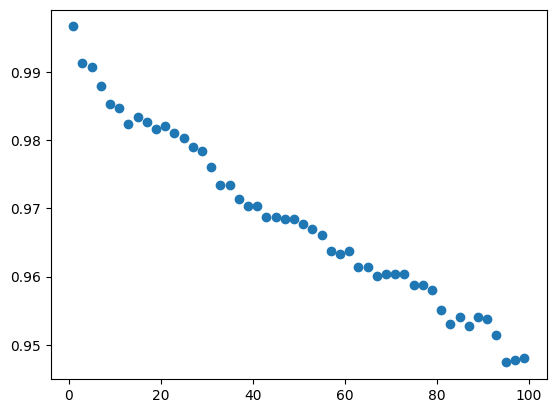

In [598]:
# let us plot a graph for various k values vs the accuracy score
res = plt.scatter(x=acc_index, y=acc_list)
plt.show()


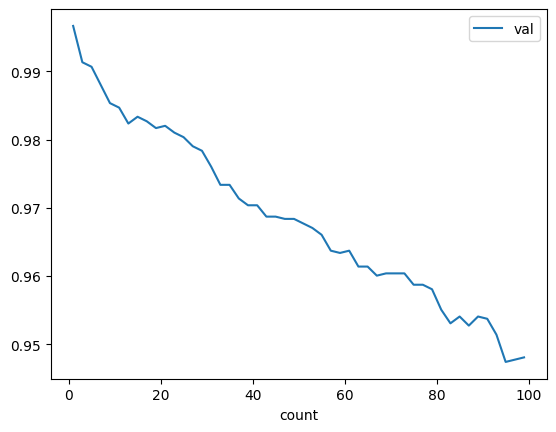

In [599]:
plt5 = pd.DataFrame({'count': acc_index, 'val': acc_list})
ax2 = plt5.plot(x='count', y='val')


In [600]:
#------------------------------------------DONE--------------------------------------------#
# all assumptions
'''
['chest'            (1)
'upper extremity'   (2)
'back'              (3)
'lower extremity'   (4)
'face'              (5)
'abdomen'           (6)
 'foot'             (7)
 'neck'             (8)
 'ear'              (9)
 'trunk'            (10)
 'scalp'            (11)
 'unknown'          (12)
 'hand']            (13) 
 '''

'''
 ['bkl'             (1)
 'nv'               (2)
 'df'               (3)
 'mel'              (4)
 vasc'              (5)
 'bcc'              (6)
 'akiec']           (7)
 '''
 #sex numbering given as follows
'''
 male   - (0)
 female - (1)
 unknown - (3)
'''
'''
for nan values the median of the ages are taken in the age column
'''

'\nfor nan values the median of the ages are taken in the age column\n'